<a href="https://colab.research.google.com/github/Gus-1003/Processamento-Digital-de-Imagem/blob/main/Pratica_2_Intensivo_OpenCV.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Fonte das Informações:

[LearnOpenCV - Getting Started with OpenCV](https://learnopencv.com/getting-started-with-opencv/)

# Importando Biblioteca:

## Pilares:

In [1]:
# Manipulação de Matrizes
import numpy as np

# Visualização de Gráficos
import matplotlib.pyplot as plt
import plotly.figure_factory as ff

# Manipulação de Imagens
import cv2
from google.colab.patches import cv2_imshow

## Acesso ao meu Drive:

In [2]:
# importe da biblioteca drive do Google Colab, que é usada para fazer a conexão com o Google Drive.
from google.colab import drive

# o método mount() para montar o Google Drive na sessão atual do Colab. Isso significa que a sessão do Colab agora terá acesso aos arquivos armazenados no Google Drive.
drive.mount('/content/drive/')

''' comando %cd é usado para mudar o diretório atual para a pasta MyDrive dentro do Google Drive, para que os arquivos dentro dessa 
pasta possam ser facilmente acessados pelo código em Python que será executado na sessão do Colab.'''

%cd /content/drive/MyDrive/

Drive already mounted at /content/drive/; to attempt to forcibly remount, call drive.mount("/content/drive/", force_remount=True).
/content/drive/MyDrive


# Lendo uma Imagem

Para ler uma imagem, use a imread() função no OpenCV. Aqui está a sintaxe:

> ***imread(filename, flags)***

Requer dois argumentos:

1. O primeiro argumento é o nome da imagem, que requer um nome de caminho completo para o arquivo.

2. O segundo argumento é um sinalizador opcional que permite especificar como a imagem deve ser representada. O OpenCV oferece várias opções para esse sinalizador, mas as mais comuns incluem:

* cv2.IMREAD_UNCHANGED || -1
* cv2.IMREAD_GRAYSCALE || 0
* cv2.IMREAD_COLOR || 1

## Obervações:

> O valor padrão para sinalizadores é 1, que será lido na imagem como uma imagem colorida;

> Também é importante observar neste ponto que o OpenCV lê imagens coloridas no formato BGR;

In [3]:
file = '/content/drive/MyDrive/Colab Notebooks/Tigre.jpg'

# imread() nos ajuda a ler uma imagem
image = cv2.imread(file)

In [4]:
'''O parâmetro "0" na função cv2.imread() do OpenCV indica que a imagem deve ser carregada como uma 
imagem em escala de cinza (grayscale)'''

img_grayscale = cv2.imread(file, 0)

# Exibindo uma imagem
No OpenCV, você exibe uma imagem usando a imshow()função. Aqui está a sintaxe:

imshow(window_name, image)

Esta função também recebe dois argumentos:

O primeiro argumento é o nome da janela que será exibido na janela.
 O segundo argumento é a imagem que você deseja exibir. 
Para exibir várias imagens de uma só vez, especifique um novo nome de janela para cada imagem que deseja exibir. 

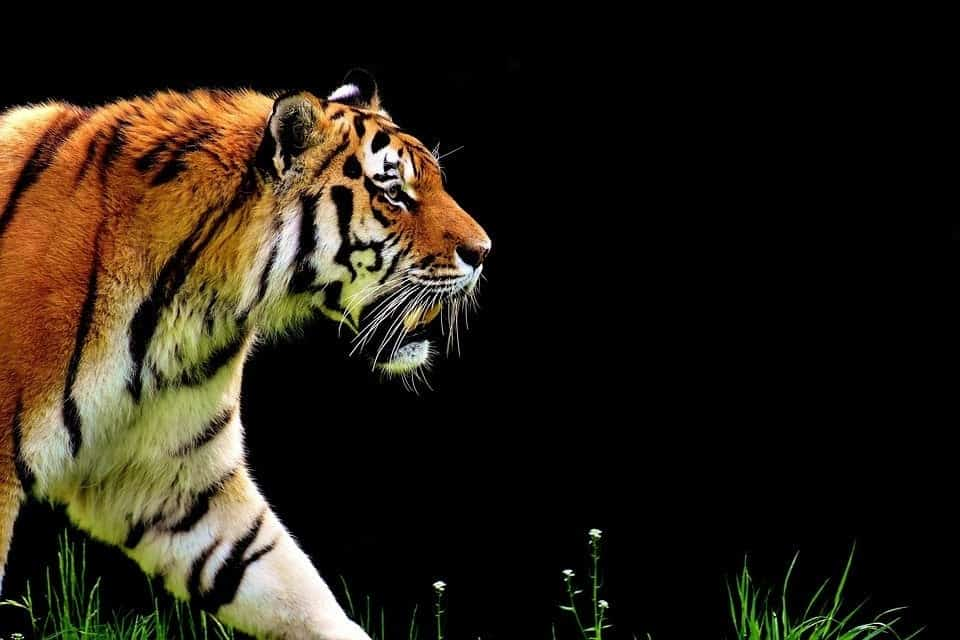

In [5]:
# imshow() exibe uma imagem em uma janela
cv2_imshow(image)

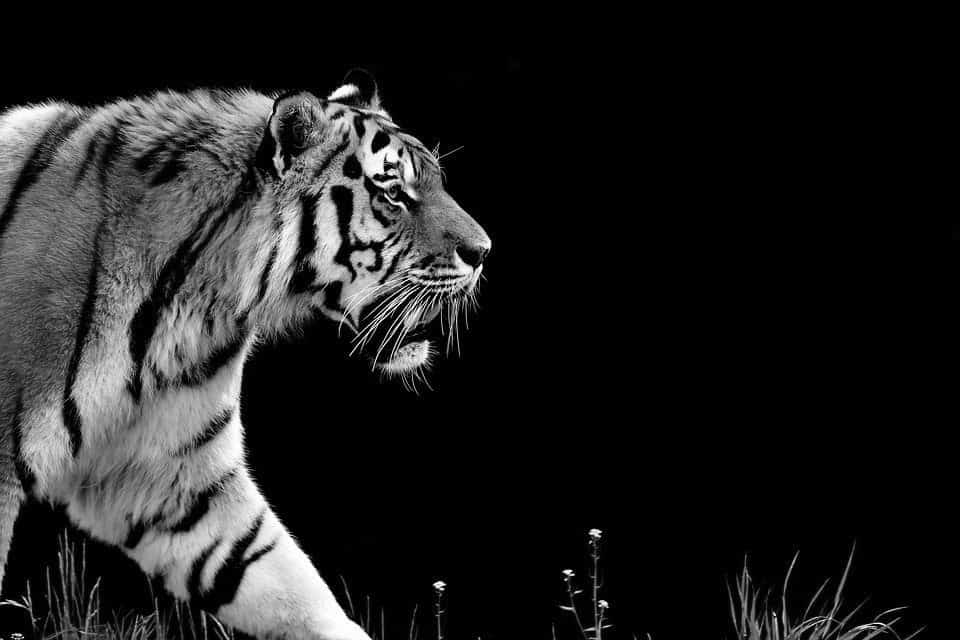

In [6]:
cv2_imshow(img_grayscale)

# Escrevendo uma imagem

Por fim, vamos discutir como gravar/salvar uma imagem no diretório de arquivos, usando a função imwrite(). Confira sua sintaxe:

> ***imwrite(filename, image)***

O primeiro argumento é o nome do arquivo, que deve incluir a extensão do nome do arquivo (por exemplo .png, .jpg etc). OpenCV usa esta extensão de nome de arquivo para especificar o formato do arquivo.

O segundo argumento é a imagem que você deseja salvar. A função retorna Truese a imagem for salva com sucesso.

In [7]:
cv2.imwrite('grayscale.jpg',img_grayscale)

True

# Redimensionamento de imagem

Para redimensionar uma imagem, dimensione-a ao longo de cada eixo (altura e largura), considerando os fatores de escala especificados ou apenas defina a altura e a largura desejadas.  

Ao redimensionar uma imagem:

* É importante ter em mente a proporção original da imagem (ou seja, largura por altura), se você quiser manter a mesma na imagem redimensionada também.
* Reduzir o tamanho de uma imagem exigirá reamostragem dos pixels. 
* Aumentar o tamanho de uma imagem requer a reconstrução da imagem. Isso significa que você precisa interpolar novos pixels.

Várias técnicas de interpolação entram em ação para realizar essas operações. Vários métodos estão disponíveis no OpenCV, a escolha geralmente depende do aplicativo específico.

In [8]:
image.shape

(640, 960, 3)

In [9]:
# Set rows and columns 
# lets downsize the image using new  width and height
down_width = 300
down_height = 200
down_points = (down_width, down_height)
resize_down = cv2.resize(image, down_points, interpolation= cv2.INTER_LINEAR)

In [10]:
# Set rows and columns
up_width = 600
up_height = 400
up_points = (up_width, up_height)

# resize the image
resized_up = cv2.resize(image, up_points, interpolation = cv2.INTER_LINEAR)

Diferentes métodos de interpolação são usados ​​para diferentes propósitos de redimensionamento.

* INTER_AREA: INTER_AREA usa relação de área de pixel para reamostragem. Isso é mais adequado para reduzir o tamanho de uma imagem (encolhimento). Quando usado para ampliar a imagem, ele usa o INTER_NEARESTmétodo.

* INTER_CUBIC: usa interpolação bicúbica para redimensionar a imagem. Ao redimensionar e interpolar novos pixels, esse método atua nos pixels 4 × 4 vizinhos da imagem. Em seguida, leva a média dos pesos dos 16 pixels para criar o novo pixel interpolado.

* INTER_LINEAR: este método é um pouco semelhante à INTER_CUBICinterpolação. Mas ao contrário de INTER_CUBIC, isso usa 2 × 2 pixels vizinhos para obter a média ponderada para o pixel interpolado.

* INTER_NEAREST: O INTER_NEARESTmétodo usa o conceito de vizinho mais próximo para interpolação. Este é um dos métodos mais simples, usando apenas um pixel vizinho da imagem para interpolação.

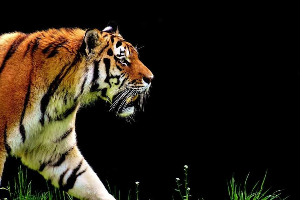

In [11]:
cv2_imshow(resize_down)

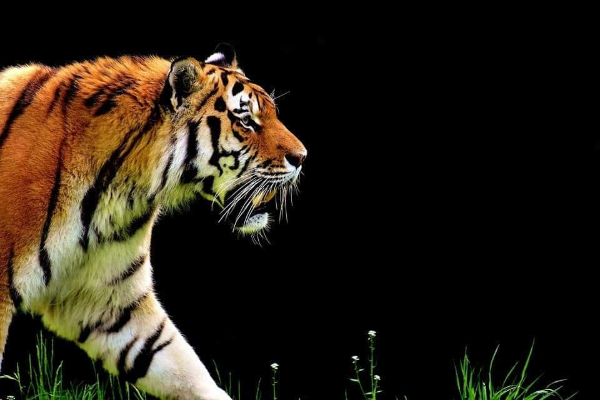

In [12]:
cv2_imshow(resized_up)

# Cortar Imagens

Não há função específica para cortar usando o OpenCV, o fatiamento da matriz NumPy é o que faz o trabalho. Cada imagem lida é armazenada em uma matriz 2D (para cada canal de cor). Basta especificar a altura e a largura (em pixels) da área a ser cortada.

In [13]:
print(image.shape) # Tamanho da imagem

(640, 960, 3)


Em Python, você recorta a imagem usando o mesmo método que o fatiamento de matriz NumPy. Para fatiar uma matriz, você precisa especificar o índice inicial e final da primeira e da segunda dimensão. 

* A primeira dimensão é sempre o número de linhas ou a altura da imagem.
* A segunda dimensão é o número de colunas ou a largura da imagem. 

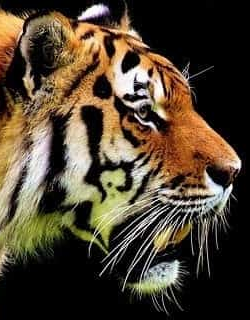

In [14]:
# Cropping an image[linhas (cima pra baixo), colunas (esquerda para direita)]
cropped_image = image[80:400, 250:500]
 
# Display cropped image
cv2_imshow(cropped_image)

In [15]:
print(resize_down.shape) # Tamanho da imagem

(200, 300, 3)


cropped = img[**start_row : end_row**  ,   **start_col : end_col**]

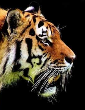

In [16]:
# Cropping an image[linhas (cima pra baixo), colunas (esquerda para direita)]
cropped_image = resize_down[20:130, 78:163]
 
# Display cropped image
cv2_imshow(cropped_image)

## Dividindo uma imagem em pequenas manchas usando recorte

In [17]:
# imread() nos ajuda a ler uma imagem
image = cv2.imread(file)

image_copy = image.copy() 
imgheight=image.shape[0]
imgwidth=image.shape[1]

M = int(imgheight / 5)
N = int(imgwidth / 5)
x1 = 0
y1 = 0

print(M)
print(N)

128
192


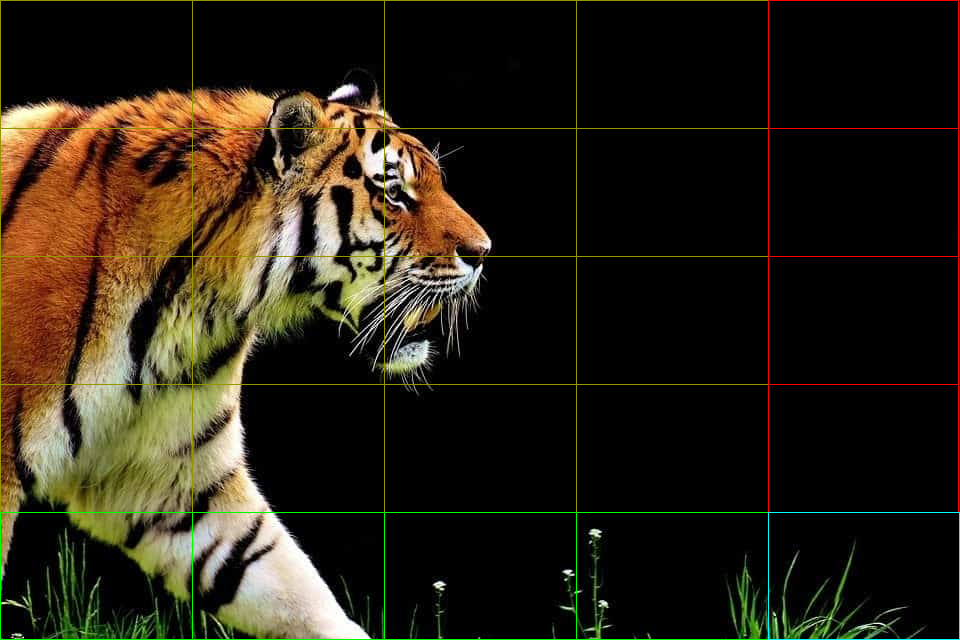

In [18]:
for y in range(0, imgheight, M):
  for x in range(0, imgwidth, N):
    if (imgheight - y) < M or (imgwidth - x) < N:
        break
          
    y1 = y + M
    x1 = x + N

    # check whether the patch width or height exceeds the image width or height
    if x1 >= imgwidth and y1 >= imgheight:
      x1 = imgwidth - 1
      y1 = imgheight - 1
      #Crop into patches of size MxN
      cv2.rectangle(image, (x, y), (x1, y1), (255, 255, 0), 1)

    elif y1 >= imgheight: # when patch height exceeds the image height
      y1 = imgheight - 1
      #Crop into patches of size MxN
      cv2.rectangle(image, (x, y), (x1, y1), (0, 255, 0), 1)

    elif x1 >= imgwidth: # when patch width exceeds the image width
      x1 = imgwidth - 2
      #Crop into patches of size MxN
      cv2.rectangle(image, (x, y), (x1, y1), (0, 0, 255), 1)

    else:
      #Crop into patches of size MxN
      cv2.rectangle(image, (x, y), (x1, y1), (0, 150, 150), 1)


cv2_imshow(image)